# MNIST Image Classification using Tensorflow & Keras

<img src="https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png" alt="" width="500" height="300">

## Package Imports

In [1]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Import Dataset

In [2]:
# 28x28 images of  hand written digits 0-9
# dataset contains 60000 training images and 10000 test images
# dataset is included as part of framework
mnist = kr.datasets.mnist

## Load images into Train and Test Sets

In [3]:
# Unpack data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


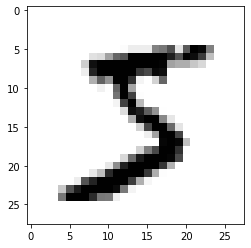

In [4]:
# uncomment for image without colour map
# plt.imshow(x_train[0])

# show first image in x training set, colour map set for black & white
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Formatting Image Data

The neural network will take a single vector for each training image,
so the input needs to be reshaped from a 28 x 28 image to a 784 dimensional vector.
The in puts will be scaled from 0 - 1.

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)

# values scaled between 0 and 1, makes it easier for a network to learn
x_train /= 255
x_test /= 255


print("train matrix shape", x_train.shape)
print("test matrix shape", y_train.shape)

train matrix shape (60000, 784)
test matrix shape (60000,)


# Modify target matrices to be in one hot format
<hr>
0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
<br>
1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
<br>
2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [6]:
y_train = kr.utils.np_utils.to_categorical(y_train, 10)
y_test = kr.utils.np_utils.to_categorical(y_test, 10)

## Build the model

In [7]:
# get model from keras
model = kr.models.Sequential()

# add hidden layer to network, 600 neurons in layer
# linear activation function
model.add(kr.layers.Dense(600, activation="linear", input_dim=784))

# add second hidden layer to network
# relu added to both layers as seems to be cited as go to function
model.add(kr.layers.Dense(400, activation="relu"))

# add output layer, 10 neurons to match classifications from MNIST
# softmax used for probability distribution
model.add(kr.layers.Dense(10, activation="softmax"))

# compile the model, adam cited as go to optimizer to start
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# fit the model and train model
model.fit(x_train, y_train, epochs=2, batch_size=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 26s 435us/step - loss: 0.2170 - acc: 0.9350
Epoch 2/2
60000/60000 [==============================] - 23s 384us/step - loss: 0.0991 - acc: 0.9696


In [8]:
# check values for loss & accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

10000/10000 [==============================] - 2s 183us/step
0.09606410255050286 0.9703


## Save the Model

In [10]:
model.save('mnist_num_reader.h5')

## Load the Model

In [11]:
new_model = kr.models.load_model('mnist_num_reader.h5')

## Make A Prediction

In [12]:
predictions = new_model.predict([x_test])

# print('x_test shape', [x_test])

# use numpy to help make a prediction on x_test set
print('At predictions index 0, number is a ', np.argmax(predictions[0]))

At predictions index 0, number is a  7


## Check prediction is Correct!

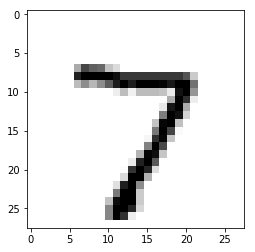

In [13]:
# show image
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)

# End

## Research References

* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb
* https://www.youtube.com/watch?v=wQ8BIBpya2k
* https://www.youtube.com/watch?v=RznKVRTFkBY&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL
